In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "xxxxxx"
os.environ['KAGGLE_KEY'] = "xxxxxx"

In [2]:
import nest_asyncio
nest_asyncio.apply()


## Dataset Download

In [3]:
from Code.dataset_download import download_dataset

download_dataset()

Dataset already exists at 'dataset\Books_data.csv'. Skipping download.


'dataset\\Books_data.csv'

### Images download

In [4]:
from Code.book_pipeline import run_download, split_dataset, create_dataset_from_df

run_download(max_images=1000)  # One-time use

train_df, val_df, test_df = split_dataset("books_with_covers_optimized.csv")

train_ds = create_dataset_from_df(train_df, batch_size=32, augment=True)
val_ds   = create_dataset_from_df(val_df, batch_size=32)
test_ds  = create_dataset_from_df(test_df, batch_size=32)
# Save the datasets to CSV
train_df.to_csv("dataset/train_data.csv", index=False)
val_df.to_csv("dataset/val_data.csv", index=False)
test_df.to_csv("dataset/test_data.csv", index=False)


 books_with_covers_optimized.csv created with 'label' column.


### Training the Custom CNN model

### Training the MobileNetV2 model

### Evaluating the models


=== Training and Evaluating Custom CNN ===
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2731 - loss: 465.8399 - val_accuracy: 0.3219 - val_loss: 1.6983
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3490 - loss: 1.5101 - val_accuracy: 0.3630 - val_loss: 1.2698
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3718 - loss: 1.3138 - val_accuracy: 0.3630 - val_loss: 1.1780
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3768 - loss: 1.2623 - val_accuracy: 0.3425 - val_loss: 1.1567
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3339 - loss: 1.2640 - val_accuracy: 0.3630 - val_loss: 1.1231
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3330 - loss: 1.2273 - val_accuracy: 0.4041 - val_loss: 1.1304
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3104 - loss: 1.2176 - val_accuracy: 0.3836 - val_loss: 1.1122
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3785 - l

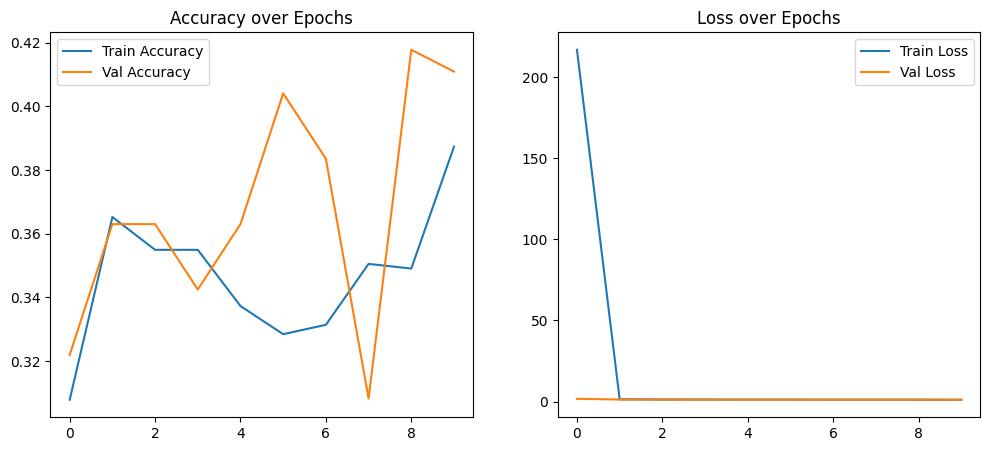

📊 Custom CNN Results:
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.3718 - loss: 1.1063
accuracy: 0.3562
loss: 1.1226
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step
              precision    recall  f1-score   support

           0       0.33      0.17      0.22        48
           1       0.35      0.76      0.48        50
           2       0.46      0.12      0.20        48

    accuracy                           0.36       146
   macro avg       0.38      0.35      0.30       146
weighted avg       0.38      0.36      0.30       146


=== Training and Evaluating MobileNetV2 ===
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 804ms/step - accuracy: 0.2972 - loss: 1.6723 - val_accuracy: 0.3973 - val_loss: 1.1196
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 720ms/step - accuracy: 0.4495 - loss: 1.1034 - val_accuracy: 0.4110 - val_loss: 1.0740
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 740ms/step - accuracy: 0.4338 - loss: 1.0705 - val_accuracy: 

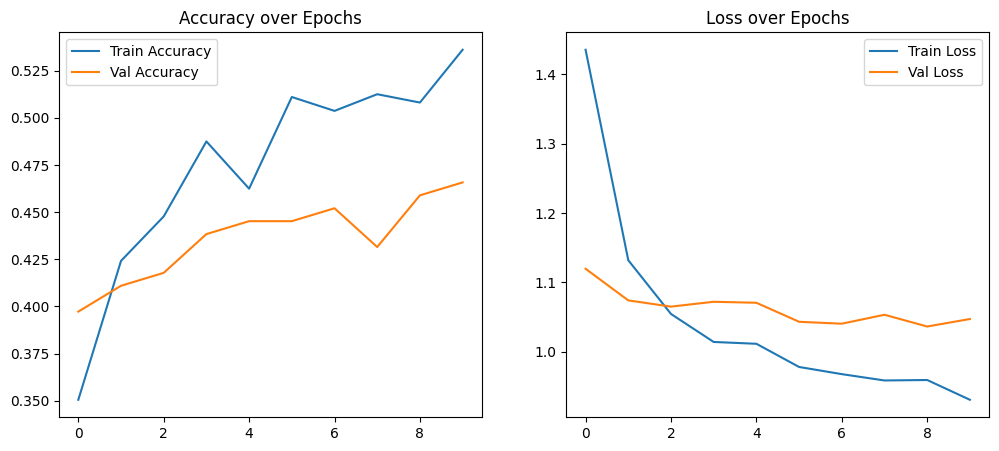

MobileNetV2 Results:
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - accuracy: 0.4356 - loss: 1.0524
accuracy: 0.4384
loss: 1.0754
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 733ms/step
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        48
           1       0.42      0.42      0.42        50
           2       0.43      0.40      0.41        48

    accuracy                           0.44       146
   macro avg       0.44      0.44      0.44       146
weighted avg       0.44      0.44      0.44       146



In [5]:
from Code.cnn_recognizer import get_model, train_model, evaluate_model, plot_training_history

# Prepare your test labels
test_labels = test_df['label'].values

# ==========================
# 1. Evaluate CNN
# ==========================
print("\n=== Training and Evaluating Custom CNN ===")
cnn_model = get_model(model_type="cnn", input_shape=(224, 224, 3), num_classes=10)
cnn_model, cnn_history = train_model(cnn_model, train_ds, val_ds, epochs=10)
plot_training_history(cnn_history)
print("Custom CNN Results:")
cnn_results = evaluate_model(cnn_model, test_ds, test_labels=test_labels)

# ==========================
# 2. Evaluate MobileNetV2
# ==========================
print("\n=== Training and Evaluating MobileNetV2 ===")
mobilenet_model = get_model(model_type="mobilenet", input_shape=(224, 224, 3), num_classes=10)
mobilenet_model, mobilenet_history = train_model(mobilenet_model, train_ds, val_ds, epochs=10)
plot_training_history(mobilenet_history)
print("MobileNetV2 Results:")
mobilenet_results = evaluate_model(mobilenet_model, test_ds, test_labels=test_labels)
